In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Leitura dos dados
bd = pd.read_csv("ibovespa.csv", sep=";")


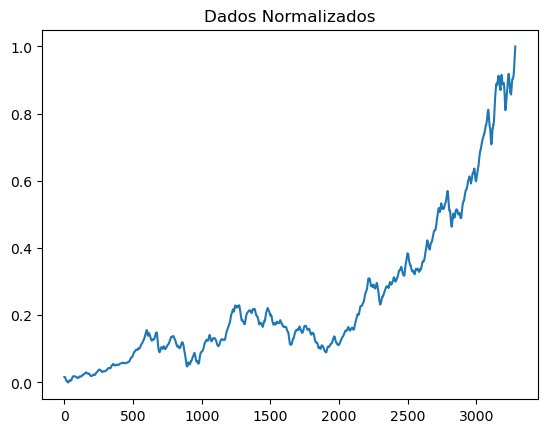

In [3]:
# Normalização dos dados
x = bd.iloc[:, 0].values.reshape(-1, 1)  # Assumindo que a primeira coluna é a que queremos
scaler = MinMaxScaler(feature_range=(0, 1))
x_normalized = scaler.fit_transform(x)
plt.plot(x_normalized)
plt.title("Dados Normalizados")
plt.show()


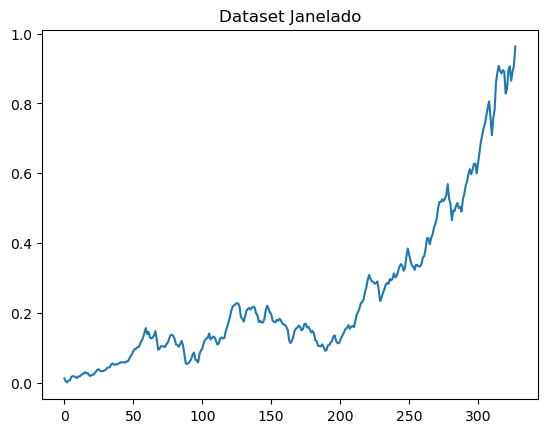

In [4]:
# Parâmetro que define o janelamento dos dados. Deve ser maior que 1
tam_janela = 10
nro_padroes = len(x_normalized) // tam_janela
dataset = np.array([x_normalized[i:i+tam_janela].flatten() for i in range(0, len(x_normalized)-tam_janela, tam_janela)])
plt.plot(dataset[:, -1])
plt.title("Dataset Janelado")
plt.show()

In [5]:
# Separação das entradas e saídas
X = dataset[:, :-1]  # Entrada (primeiras colunas)
y = dataset[:, -1]   # Saída (última coluna)

# Separação do conjunto de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [10]:
# Separação sequencial
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
# Treinamento da rede
model = MLPRegressor(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=60000, learning_rate_init=0.9)
model.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(2,),
             learning_rate_init=0.9, max_iter=60000)

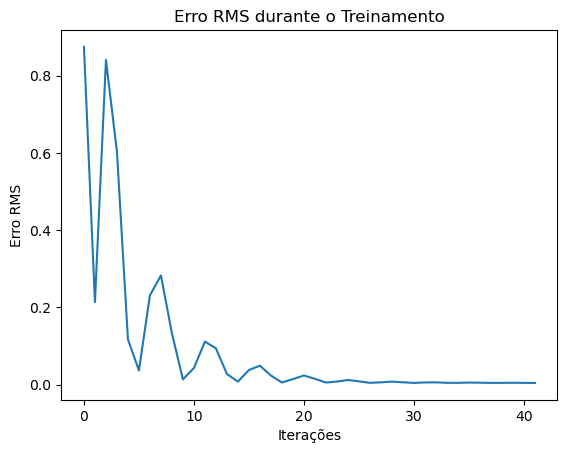

In [12]:
# Plotagem do gráfico de erro (loss curve)
plt.plot(model.loss_curve_)
plt.title("Erro RMS durante o Treinamento")
plt.xlabel("Iterações")
plt.ylabel("Erro RMS")
plt.show()


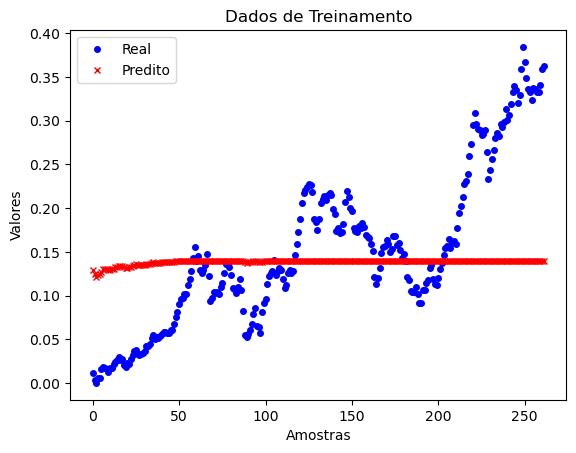

In [13]:
# Plot dados de treinamento
predictions_train = model.predict(X_train)
plt.plot(range(len(y_train)), y_train, label="Real", marker='o', linestyle='none', color='blue', markersize=4)
plt.plot(range(len(predictions_train)), predictions_train, label="Predito", marker='x', linestyle='none', color='red', markersize=4)
plt.title("Dados de Treinamento")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.legend()
plt.show()

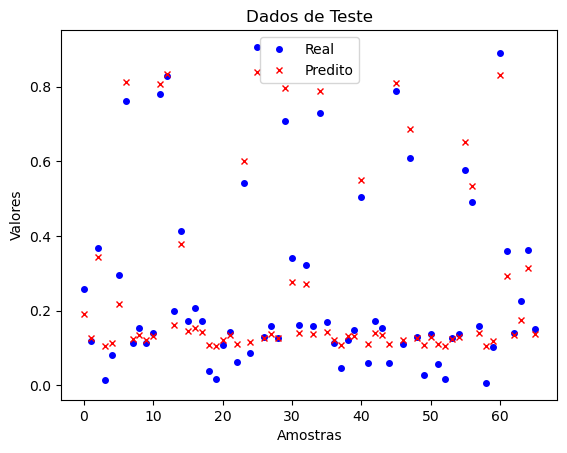

In [9]:
# Plot dados de teste
predictions_test = model.predict(X_test)
plt.plot(range(len(y_test)), y_test, label="Real", marker='o', linestyle='none', color='blue', markersize=4)
plt.plot(range(len(predictions_test)), predictions_test, label="Predito", marker='x', linestyle='none', color='red', markersize=4)
plt.title("Dados de Teste")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.legend()
plt.show()